# Lorenz 63 example

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from odmd import OnlineDMD
import time

In [277]:
%run DMD_functions.ipynb
%run fDMD_functions.ipynb
%run Hemati_DMD_functions.ipynb

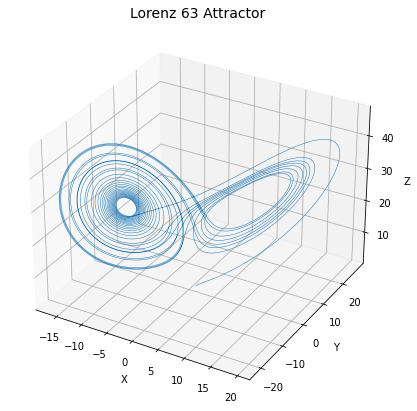

In [278]:

# Lorenz 63 system
def lorenz63(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Initial state
initial_state = [1, 1, 1]

# Time span
t_span = (0, 25)  # From t=0 to t=50
t_eval = np.linspace(*t_span, 100000)  # Time points for evaluation

# Solve the system
solution = solve_ivp(lorenz63, t_span, initial_state, t_eval=t_eval, args=(sigma, rho, beta))

# Extract the solution
x, y, z = solution.y

# Plot the Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz 63 Attractor", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

x=np.array([x[i] for i in range(0,100000, 10)]).reshape(1,-1)
y=np.array([y[i] for i in range(0,100000, 10)]).reshape(1,-1)
z=np.array([z[i] for i in range(0,100000, 10)]).reshape(1,-1)


In [279]:
"""import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Time-dependent Lorenz 63 system
def lorenz63_time_varying(t, state, sigma_func, rho_func, beta_func):
    x, y, z = state
    sigma = sigma_func(t)  # Time-varying sigma
    rho = rho_func(t)      # Time-varying rho
    beta = beta_func(t)    # Time-varying beta
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Define time-varying parameter functions
def sigma_func(t):
    return 10.0 + 5.0 * np.sin(0.1 * t)  # Oscillates between 5 and 15

def rho_func(t):
    return 28.0 + 10.0 * np.cos(0.05 * t)  # Oscillates between 18 and 38

def beta_func(t):
    return 8.0 / 3.0 + 0.1 * np.sin(0.2 * t)  # Small oscillation around 8/3

# Initial state
initial_state = [1.0, 1.0, 1.0]

# Time span
t_span = (0, 100)  # From t=0 to t=100
t_eval = np.linspace(*t_span, 10000)  # Time points for evaluation

# Solve the system
solution = solve_ivp(lorenz63_time_varying, t_span, initial_state, t_eval=t_eval,
                     args=(sigma_func, rho_func, beta_func))

# Extract the solution
x, y, z = solution.y

# Plot the Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz 63 Attractor with Time-Varying Parameters", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
"""

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.integrate import solve_ivp\n\n# Time-dependent Lorenz 63 system\ndef lorenz63_time_varying(t, state, sigma_func, rho_func, beta_func):\n    x, y, z = state\n    sigma = sigma_func(t)  # Time-varying sigma\n    rho = rho_func(t)      # Time-varying rho\n    beta = beta_func(t)    # Time-varying beta\n    dxdt = sigma * (y - x)\n    dydt = x * (rho - z) - y\n    dzdt = x * y - beta * z\n    return [dxdt, dydt, dzdt]\n\n# Define time-varying parameter functions\ndef sigma_func(t):\n    return 10.0 + 5.0 * np.sin(0.1 * t)  # Oscillates between 5 and 15\n\ndef rho_func(t):\n    return 28.0 + 10.0 * np.cos(0.05 * t)  # Oscillates between 18 and 38\n\ndef beta_func(t):\n    return 8.0 / 3.0 + 0.1 * np.sin(0.2 * t)  # Small oscillation around 8/3\n\n# Initial state\ninitial_state = [1.0, 1.0, 1.0]\n\n# Time span\nt_span = (0, 100)  # From t=0 to t=100\nt_eval = np.linspace(*t_span, 10000)  # Time points for evaluation\n\n# Solve 

# without stacking
- we have more snapshots than the snapshot length - fDMD functions

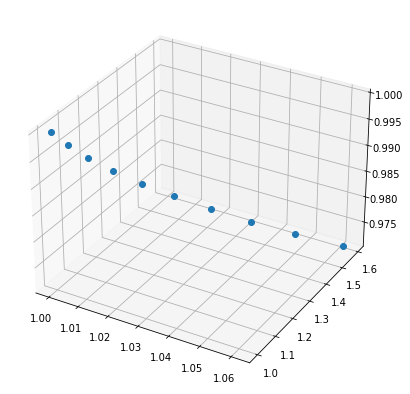

In [280]:
data = np.vstack((x, y, z))


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[0,:10], data[1,:10], data[2,:10], 'o')
plt.show()

(n,m) = data.shape

In [281]:
#####################################################################################################
##      Kada uzmem 200 snapshotova

q = 10 #toliko uzmem za pocetak
kraj=200

############################################################################################################
##          ZHANG

odmd = OnlineDMD(n, 1.0)
odmd.initialize(data[:, :q], data[:, 1:q+1])
start = time.time()
for k in range(q, kraj-1):
    odmd.update(data[:, k], data[:, k+1])
end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = odmd.computemodes()

times = [i for i in range (kraj+10)]

reconstructed_zhang = DMD_reconstruction(data[:,:kraj], Z_z, 'all', Lambda_z, times) #ako pokusam cijeli rekonstruirati - overflow - sv vrijednosti neke su vece od 1 pa je 10000-ti previse rekonstruirati (i puno prije toga)

#######################################################################################################
##      NAS

#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data[:,:q], data[:,1:q+1])

start = time.time()
for k in range(q, kraj-1):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.hstack((data[:,k], data[:,k+1])).reshape(-1,1), Q, L)
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")

times = [i for i in range (kraj+10)]

reconstructed_nas = DMD_reconstruction(data[:,:kraj], Z_nas, 'all', Lambda_nas, times)

Online DMD zhang, weighting = 1, time = 0.006741046905517578 secs
Online DMD nas, weighting = 1, time = 0.06598377227783203 secs


In [282]:
#####################################################################################################
##      Kada uzmem 80 snapshotova

q = 10 #toliko uzmem za pocetak
kraj_m=80

############################################################################################################
##          ZHANG

odmd = OnlineDMD(n, 1.0)
odmd.initialize(data[:, :q], data[:, 1:q+1])
start = time.time()
for k in range(q, kraj_m-1):
    odmd.update(data[:, k], data[:, k+1])
end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = odmd.computemodes()

times = [i for i in range (kraj_m+10)]

reconstructed_zhang_manji = DMD_reconstruction(data[:,:kraj_m], Z_z, 'all', Lambda_z, times) #ako pokusam cijeli rekonstruirati - overflow - sv vrijednosti neke su vece od 1 pa je 10000-ti previse rekonstruirati (i puno prije toga)

#######################################################################################################
##      NAS

#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data[:,:q], data[:,1:q+1])

start = time.time()
for k in range(q, kraj_m-1):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.hstack((data[:,k], data[:,k+1])).reshape(-1,1), Q, L)
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")

times = [i for i in range (kraj_m+10)]

reconstructed_nas_manji = DMD_reconstruction(data[:,:kraj_m], Z_nas, 'all', Lambda_nas, times)

Online DMD zhang, weighting = 1, time = 0.0035054683685302734 secs
Online DMD nas, weighting = 1, time = 0.033660173416137695 secs


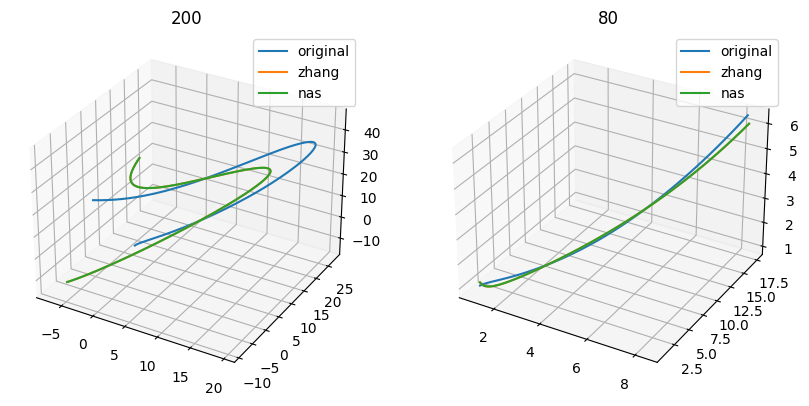

In [283]:
%matplotlib inline
#%matplotlib widget
fig = plt.figure(figsize=(10, 7), dpi=100)
ax = fig.add_subplot(121, projection='3d')

kraj_c = kraj+10
ax.plot(data[0,:kraj_c], data[1,:kraj_c], data[2,:kraj_c], label="original")
ax.plot(reconstructed_zhang[0,:kraj_c], reconstructed_zhang[1,:kraj_c], reconstructed_zhang[2,:kraj_c], label="zhang")
ax.plot(reconstructed_nas[0,:kraj_c], reconstructed_nas[1,:kraj_c], reconstructed_nas[2,:kraj_c], label="nas")
ax.legend()
ax.set_title('200')


ax2=fig.add_subplot(122, projection='3d')
kraj_c = kraj_m+10
ax2.plot(data[0,:kraj_c], data[1,:kraj_c], data[2,:kraj_c], label="original")
ax2.plot(reconstructed_zhang_manji[0,:kraj_c], reconstructed_zhang_manji[1,:kraj_c], reconstructed_zhang_manji[2,:kraj_c], label="zhang")
ax2.plot(reconstructed_nas_manji[0,:kraj_c], reconstructed_nas_manji[1,:kraj_c], reconstructed_nas_manji[2,:kraj_c], label="nas")
ax2.legend()
ax2.set_title('80')
plt.show()

... zaključak: treba window verzija, ovo ne funkcionira dobro čim pređemo na duži slučaj

In [284]:
print(Z_z); print("\n",Z_nas) #poklapaju se 

[[ 0.33208815 -0.10301381  0.41518577]
 [-0.53577639 -0.4436666   0.89163102]
 [ 0.77631251  0.89025171  0.18059594]]

 [[-0.33208815  0.41518577 -0.10301381]
 [ 0.53577639  0.89163102 -0.4436666 ]
 [-0.77631251  0.18059594  0.89025171]]


# STACKED fDMD

In [285]:
num_stack = 10
#num_stack=30
data_stacked = data[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    data_stacked=np.vstack((data_stacked,data[:,i:(m-num_stack+1+i)]))

(n,m)=data_stacked.shape

In [286]:
#je li dobro formirano..

print(data_stacked.shape)

k=np.random.randint(num_stack, m-num_stack)
for i in range(num_stack):
    if(np.all(data[:3,k]==data_stacked[3*i:3*i+3,k-i])):
        print(True, end=" ")
    else:
        print(False, data[:2,k],data_stacked[2*i:2*i+2,k-i])

(30, 9991)
True True True True True True True True True True 

In [287]:
#####################################################################################################
##      Kada uzmem 200 snapshotova

q = 61 #toliko uzmem za pocetak  - mora biti vece od 2*duzine (2*3*num_stack) da bi funkcioniralo
kraj=200

############################################################################################################
##          ZHANG

odmd = OnlineDMD(n, 1.0)
odmd.initialize(data_stacked[:, :q], data_stacked[:, 1:q+1])
start = time.time()
for k in range(q, kraj-1):
    odmd.update(data_stacked[:, k], data_stacked[:, k+1])
end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = odmd.computemodes()

times = [i for i in range (kraj+10)]

reconstructed_zhang_st = DMD_reconstruction(data_stacked[:,:kraj], Z_z, 'all', Lambda_z, times) #ako pokusam cijeli rekonstruirati - overflow - sv vrijednosti neke su vece od 1 pa je 10000-ti previse rekonstruirati (i puno prije toga)

#######################################################################################################
##      NAS

#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data_stacked[:,:q], data_stacked[:,1:q+1])

start = time.time()
for k in range(q, kraj-1):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.hstack((data_stacked[:,k], data_stacked[:,k+1])).reshape(-1,1), Q, L)
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")

times = [i for i in range (kraj+10)]

reconstructed_nas_st = DMD_reconstruction(data_stacked[:,:kraj], Z_nas, 'all', Lambda_nas, times)

Online DMD zhang, weighting = 1, time = 0.008313655853271484 secs
Online DMD nas, weighting = 1, time = 0.2582252025604248 secs


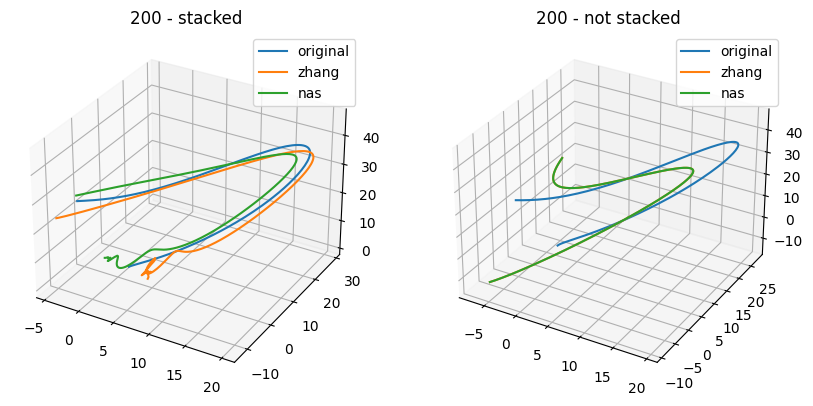

In [288]:
%matplotlib inline
#%matplotlib widget
fig = plt.figure(figsize=(10, 7), dpi=100)
ax = fig.add_subplot(121, projection='3d')

kraj_c = kraj+10
ax.plot(data_stacked[-3,:kraj_c], data_stacked[-2,:kraj_c], data_stacked[-1,:kraj_c], label="original")
ax.plot(reconstructed_zhang_st[-3,:kraj_c], reconstructed_zhang_st[-2,:kraj_c], reconstructed_zhang_st[-1,:kraj_c], label="zhang")
ax.plot(reconstructed_nas_st[-3,:kraj_c], reconstructed_nas_st[-2,:kraj_c], reconstructed_nas_st[-1,:kraj_c], label="nas")
ax.legend()
ax.set_title('200 - stacked')

ax2=fig.add_subplot(122, projection='3d')
ax2.plot(data[0,:kraj_c], data[1,:kraj_c], data[2,:kraj_c], label="original")
ax2.plot(reconstructed_zhang[0,:kraj_c], reconstructed_zhang[1,:kraj_c], reconstructed_zhang[2,:kraj_c], label="zhang")
ax2.plot(reconstructed_nas[0,:kraj_c], reconstructed_nas[1,:kraj_c], reconstructed_nas[2,:kraj_c], label="nas")
ax2.legend()
ax2.set_title('200 - not stacked')

plt.show()

#sto se dogada na pocetku?? zasto ovako?

##generalno bolji stacked?

# more stacked  + window (tall and skinny matrice)

In [289]:
(n,m) = data.shape
num_stack = 70
#num_stack=100
data_stacked = data[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    data_stacked=np.vstack((data_stacked,data[:,i:(m-num_stack+1+i)]))

(n,m)=data_stacked.shape

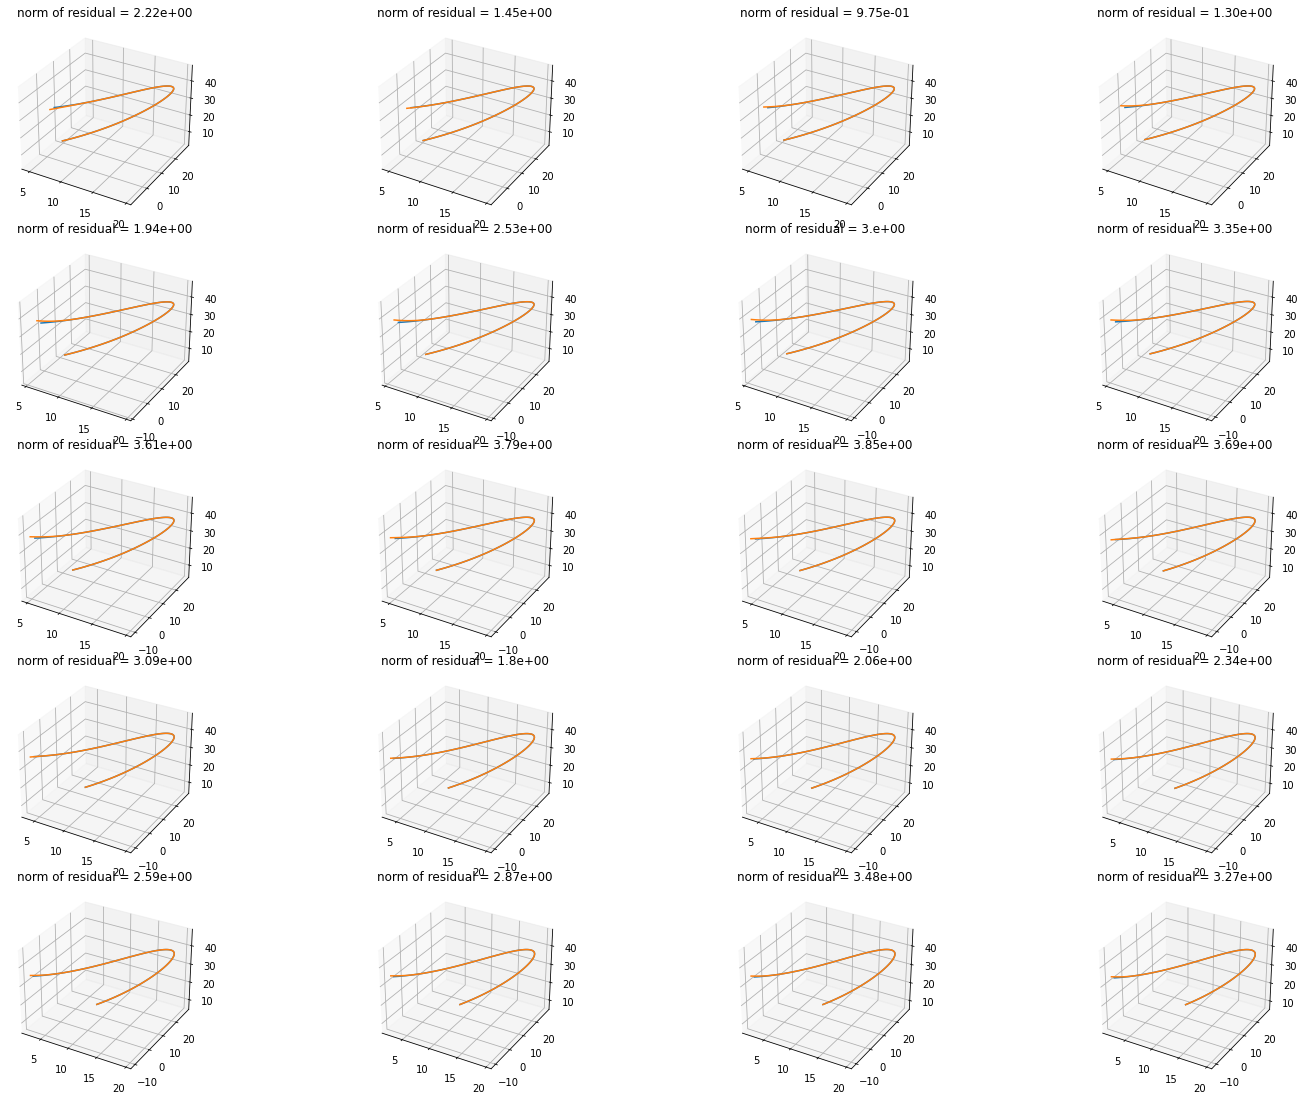

In [290]:
####################################################################################################################################
#       WINDOW DMD
####################################################################################################################################


#dodajem 1
koliko_predvidam=10

poc=0; zav=100


koliko_x=5; koliko_y=4
fig = plt.figure(figsize=(20, 15),constrained_layout=True)

Z, L, r, Q, R = GEDMDQ(data_stacked[:,poc:zav], tol=1e-4) #puuuno bolje kada stavim ovaj tol (1e-4) ili tol=1e-6 nego defaultno

threshold=100000
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(data_stacked[:,poc:(zav-1)], Z, 'all', L, times)


ax = fig.add_subplot(koliko_x, koliko_y, 1, projection='3d')
ax.plot(data_stacked[-3, poc:zav+koliko_predvidam],data_stacked[-2, poc:zav+koliko_predvidam], data_stacked[-1,poc:zav+koliko_predvidam]) 
ax.plot(predicted[-3,:],predicted[-2,:], predicted[-1,:])
res=np.linalg.norm(predicted[-3:,-koliko_predvidam:]-data_stacked[-3:,zav:zav+koliko_predvidam])
ax.set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))

br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R)
        
        Z, L, r, Q, R = DMD_added_snap(data_stacked[:,(zav-1):zav], Q, R, ngram=1, tol=1e-4)

        indices=np.where(r < threshold)[0]

        predicted = DMD_reconstruction(data_stacked[:,poc:(zav-1)], Z, 'all', L, times)
        ax = fig.add_subplot(koliko_x, koliko_y, 1+j+koliko_y*i, projection='3d')
        ax.plot(data_stacked[-3, poc:zav+koliko_predvidam],data_stacked[-2, poc:zav+koliko_predvidam], data_stacked[-1,poc:zav+koliko_predvidam])
        ax.plot(predicted[-3,:],predicted[-2,:], predicted[-1,:])
        res=np.linalg.norm(predicted[-3:,-koliko_predvidam:]-data_stacked[-3:,zav:zav+koliko_predvidam])
        ax.set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))

#plt.tight_layout()
plt.show()


(11, 99) (11, 99) (11, 11) (11, 11) (11, 11)


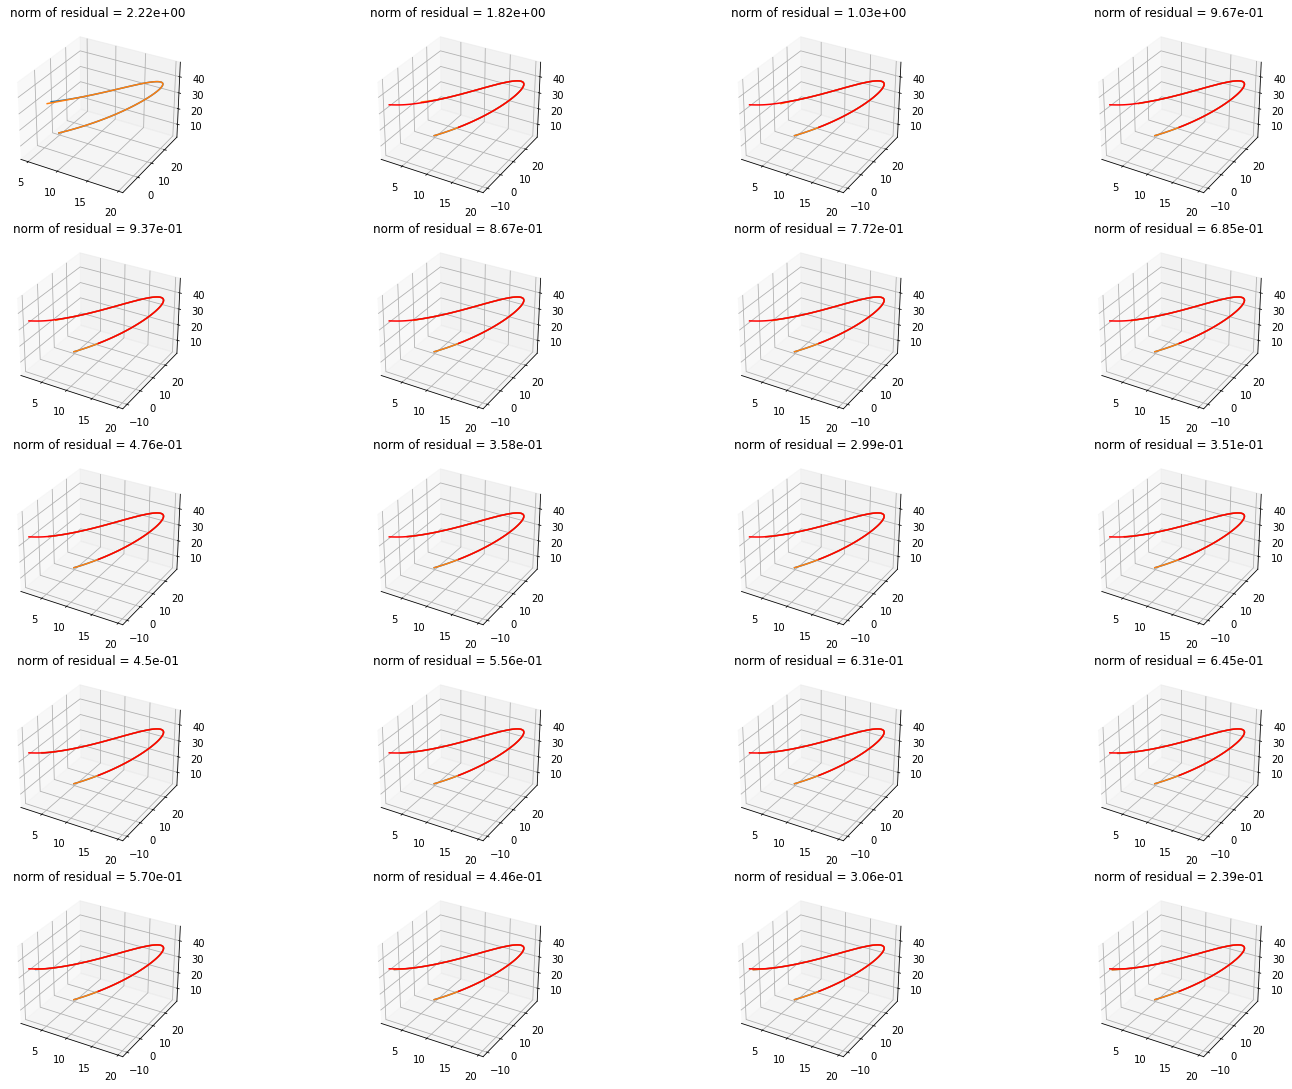

In [ ]:
####################################################################################################################################
#           Hemati DMD
####################################################################################################################################

%matplotlib inline
#dodajem 1
koliko_predvidam=10

poc=0; zav=100


koliko_x=5; koliko_y=4
fig = plt.figure(figsize=(20, 15),constrained_layout=True)

Z, L, r, Q, R = GEDMDQ(data_stacked[:,poc:zav], tol=1e-4)


threshold=1/50
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted_hemati=DMD_reconstruction(data_stacked[:,poc:(zav-1)], Z, 'all', L, times)

ax = fig.add_subplot(koliko_x, koliko_y, 1, projection='3d')
ax.plot(data_stacked[-3, poc:zav+koliko_predvidam],data_stacked[-2, poc:zav+koliko_predvidam], data_stacked[-1,poc:zav+koliko_predvidam]) 
ax.plot(predicted_hemati[-3,:],predicted_hemati[-2,:], predicted_hemati[-1,:])
res=np.linalg.norm(predicted_hemati[-3:,-koliko_predvidam:]-data_stacked[-3:,zav:zav+koliko_predvidam])
ax.set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))

tol=1e-4
U_x, Sigma, _ = np.linalg.svd(data_stacked[:,poc:zav-1],full_matrices=False) 
k=m
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_x = U_x[:, :k]

U_y, Sigma, _ = np.linalg.svd(data_stacked[:,poc+1:zav],full_matrices=False) 
k=m
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_y = U_y[:, :k]

X_tilda=U_x.T@data_stacked[:,poc:zav-1]; Y_tilda=U_y.T@data_stacked[:,poc+1:zav]
A = Y_tilda@X_tilda.T; Gx=X_tilda@X_tilda.T; Gy = Y_tilda@Y_tilda.T

print(X_tilda.shape, Y_tilda.shape, A.shape, Gx.shape, Gy.shape)
x=data_stacked[:,zav-1:zav]

br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc; zav=zav+1
        times=[i for i in range(zav-poc+koliko_predvidam)]
        y=data_stacked[:,zav-1:zav]

        U_x, U_y, A, Gx, Gy = Hemati_update(U_x, U_y, A, Gx, Gy, x, y)
        Z, L = Hemati_compute_modes(U_x, U_y, A, Gx)
        indices=np.where(abs(L)<1e6)[0]

        predicted_hemati = DMD_reconstruction(data_stacked[:,poc:(zav-1)], Z, 'all', L, times)
        
        ax = fig.add_subplot(koliko_x, koliko_y, 1+j+koliko_y*i, projection='3d')
        ax.plot(data_stacked[-3, poc:zav+koliko_predvidam],data_stacked[-2, poc:zav+koliko_predvidam], data_stacked[-1,poc:zav+koliko_predvidam])
        ax.plot(predicted_hemati[-3,:],predicted_hemati[-2,:], predicted_hemati[-1,:]) #narancasto - hemati
        ax.plot(predicted[-3,:],predicted[-2,:], predicted[-1,:],color="r") #crveno-nase
        res=np.linalg.norm(predicted_hemati[-3:,-koliko_predvidam:]-data_stacked[-3:,zav:zav+koliko_predvidam])
        ax.set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        x=y
    #ako norma res < 1e-1 npr. odsjeci sve osim zadnjih k
        """if res > 1/50:
            poc=zav-50
            threshold = 1e-2
            """


##isto - treba pogledati sto kada vise u buducnost idemo